# Candy Data-set
On this notebook an Exploratory Data Analysis would be perform.
The data was downloaded from [link](https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking?resource=download)

In [1]:
import pandas as pd

df = pd.read_csv('data/the-ultimate-halloween-candy-power-ranking/candy-data.csv')

Columns on dataset tells you the following story, for each candy:

- chocolate: Does it contain chocolate?
- fruity: Is it fruit flavored?
- caramel: Is there caramel in the candy?
- peanutalmondy: Does it contain peanuts, peanut butter or almonds?
- nougat: Does it contain nougat?
- crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?
- hard: Is it a hard candy?
- bar: Is it a candy bar?
- pluribus: Is it one of many candies in a bag or box?
- sugarpercent: The percentile of sugar it falls under within the data set.
- pricepercent: The unit price percentile compared to the rest of the set.
- winpercent: The overall win percentage according to 269,000 matchups.



## step 1 - Know better your data
meet the data info, shape an structure. 

Answer this question, What story is telling a row on your data?

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [3]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
df.shape

(85, 13)

Let's check duplicates

In [7]:
duplicates = df[df.duplicated()]
duplicates.shape

(0, 13)

Let's check missing values

In [8]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

# step 2 - outliers 

In [7]:
import seaborn as sns

float_type_columns = df.select_dtypes(include=['float64']).columns
print(float_type_columns)


Index(['sugarpercent', 'pricepercent', 'winpercent'], dtype='object')


In [19]:
df[float_type_columns].describe()

,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000
mean,0.478647,0.468882,50.316764
std,0.282778,0.285740,14.714357
min,0.011000,0.011000,22.445341
25%,0.220000,0.255000,39.141056
50%,0.465000,0.465000,47.829754
75%,0.732000,0.651000,59.863998
max,0.988000,0.976000,84.180290


<Axes: ylabel='sugarpercent'>

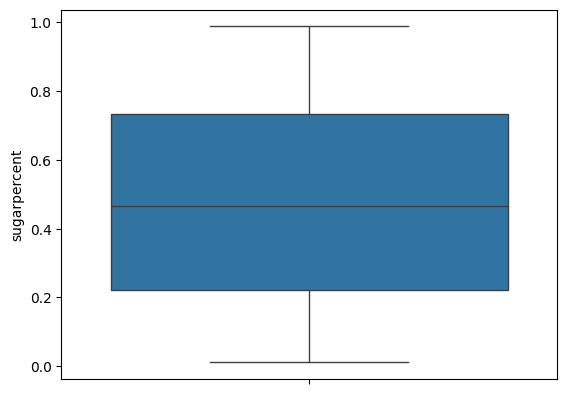

In [5]:
sns.boxplot(data=df[float_type_columns[0]])

<Axes: ylabel='pricepercent'>

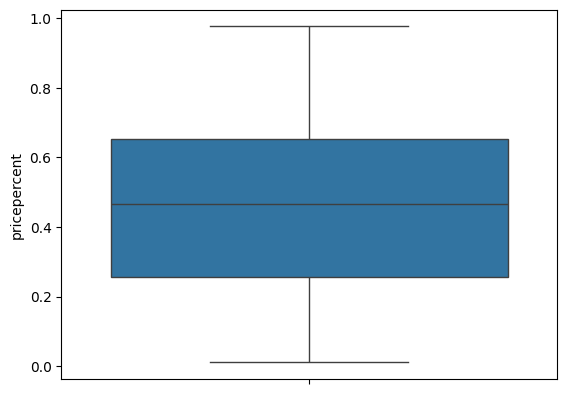

In [6]:
sns.boxplot(data=df[float_type_columns[1]])

<Axes: ylabel='winpercent'>

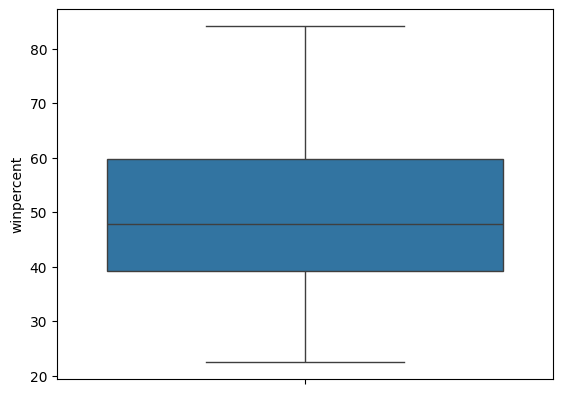

In [8]:
sns.boxplot(data=df[float_type_columns[2]])

Conclusion: since there is no points above, we do not have to worry about outliers for now on. 

# Step 3 - variables relationship

In this step we need to focus on variable relationship, which is key on modeling a ML algorithm.

In this case, we will develop a heat map which is useful to see dependent variables

<Axes: >

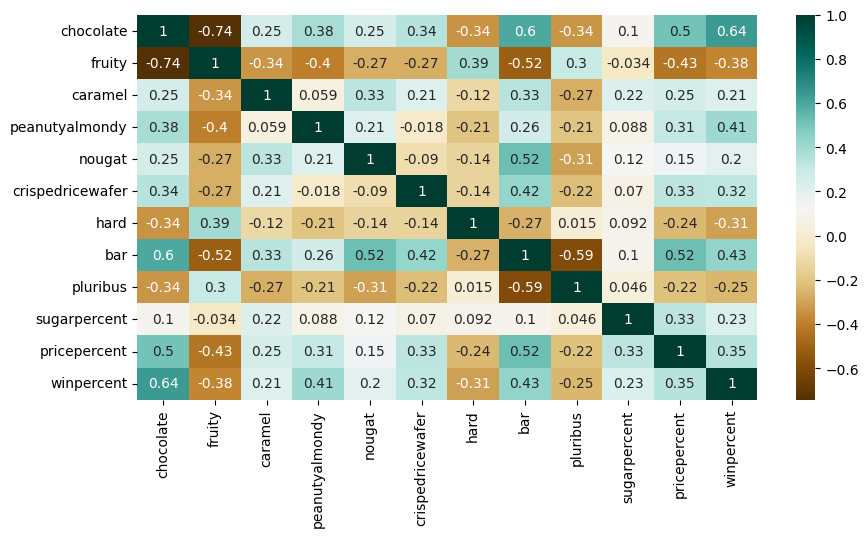

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
df_features = df.drop('competitorname', axis=1)
c = df_features.corr()

sns.heatmap(c, cmap='BrBG', annot=True)